# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [139]:
import pandas as pd
blast_df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv",comment="#")
#this column is all NaN. there's one row with a single space though
blast_df = blast_df.drop("Unnamed: 15",axis=1)
blast_df


,"# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives, bonds, publications",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,YP_220550.1,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
1,YP_220550.1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
2,YP_220550.1,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
3,YP_220550.1,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
4,YP_220550.1,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,YP_220550.1,ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,"17,348",6
96,YP_220550.1,ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,"7,105",19
97,YP_220550.1,YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,"18,940",37
98,YP_220550.1,YP_009414363.1,85.174,317,47,0,1,317,1,317,0,551,94.01,"18,762",5


In [140]:
fields = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications"]
blast_df.columns = fields
blast_df = blast_df.drop("query acc.ver", axis=1)
blast_df = blast_df.set_index("subject acc.ver")
blast_df.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3


### Question 2
What is the average number of publications?

In [141]:
print(blast_df.dtypes)
blast_df['publications'] = pd.to_numeric(blast_df['publications'], errors='coerce')
publications = round(blast_df["publications"].mean())

print(publications)

% identity          float64
alignment length      int64
mismatches            int64
gap opens             int64
q. start              int64
q. end                int64
s. start              int64
s. end                int64
evalue                int64
bit score             int64
% positives         float64
bonds                object
publications         object
dtype: object
27


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [142]:
# print(blast_df.dtypes)
# print(blast_df['bonds'].value_counts())
blast_df['bonds'] = blast_df['bonds'].str.replace(r',', '', regex=True)
blast_df['bonds'] = pd.to_numeric(blast_df['bonds'], errors='coerce')
# blast_df.head()
over15000 = blast_df[blast_df["bonds"] > 15000].index
over15000


Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

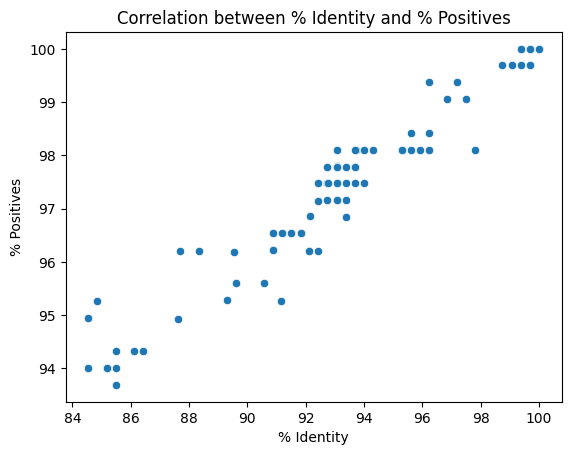

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

blast_df.head()

columns = blast_df[['% identity', '% positives']]
sns.scatterplot(x='% identity', y='% positives', data=columns)
plt.title('Correlation between % Identity and % Positives')
plt.xlabel('% Identity')
plt.ylabel('% Positives')
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [144]:
protein_source_df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")
merge_df = pd.merge(blast_df, protein_source_df[['Protein', 'Source']], left_on='subject acc.ver', right_on='Protein', how='left')
merge_df = merge_df.rename(columns={'Source': 'Protein source'})
merge_df


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein,Protein source
0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,NP_904328.1,RefSeq
1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN,NaN
2,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,YP_220563.1,GenPept
3,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN,NaN
4,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NaN,NaN
96,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NaN,NaN
97,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,YP_009414156.1,GenPept
98,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5.0,YP_009414363.1,GenPept
